# Example GAN evaluation
Tutorial which shows how to evaluate a GAN

first run 'cd ../..' to be in the root directory so that you can import custom packages via notebook

In [1]:
cd ../..

/Users/hao/workspace/hpi_de/4th_Semester/Applied Machine Learning/sensor-data-gans


## import

In [2]:
from gans.gan_evaluator import GanEvaluator

## Initialize GanEvaluator

In [3]:
model_file = './test/generator_0_tf1-0.7102846648301194_vf1-0.7184628237259816.keras'
act_id = 0

In [4]:
gan_evalator = GanEvaluator(generator_file=model_file, act_id=act_id)

## Load and transform Data

In [5]:
# data parameters
train_path = './datasets/mydata/train_df.h5'
test_path = './datasets/mydata/test_df.h5'

# what action to generate
act_id = 0

# preprocessing parameters
window_size = 5*50
step_size = int(window_size/2)
method ='sliding'
col_names = ['userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z', 'userAcceleration.c']
input_cols_train=['userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z']
input_cols_eval=['userAcceleration.c']

In [6]:
gan_evalator.init_data(train_path=train_path,
                      test_path=test_path,
                      window_size=window_size,
                      step_size=step_size,
                      method=method,
                      col_names=col_names,
                      input_cols_train=input_cols_train,
                      input_cols_eval=input_cols_eval
                     )

Load Data...
Transform Data...
Calculate origin performance...
Original training acc:  0.711872826626925
Original training f1_score for act_id  0 :  0.7480657640232108 

Original test acc:  0.6947040498442367
Original test f1_score for act_id  0 :  0.8100502512562814 

Done!


## Evaluate

In [7]:
percentage = 0.2

In [8]:
x_train_gen, y_train_gen, num_gen = gan_evalator.generate_data(percentage=percentage)
gen_train_f1_score, gen_test_f1_score = gan_evalator.eval_performance(x_train_gen, y_train_gen)

In [9]:
print('Train F1-Score: ', gen_train_f1_score)
print('Test F1-Score: ', gen_test_f1_score)

Train F1-Score:  0.709470304975923
Test F1-Score:  0.7917485265225933


### Plots

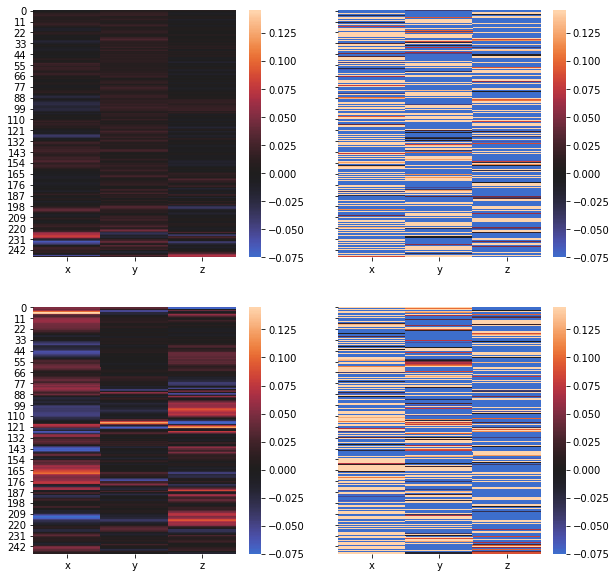

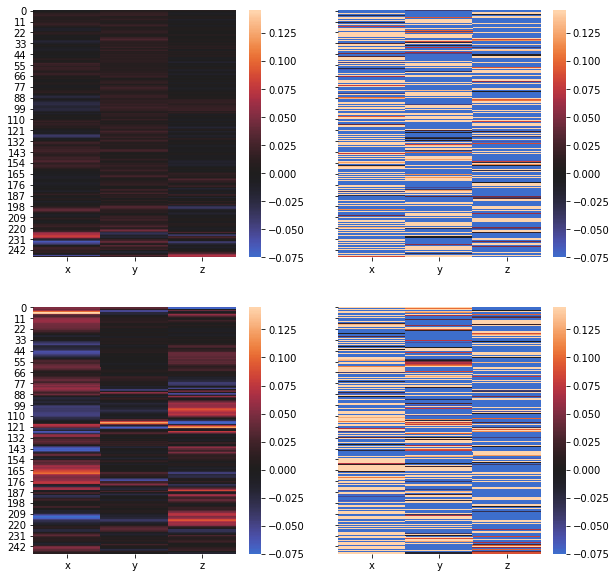

In [10]:
gan_evalator.plot_heat_maps(2, random_state=42)

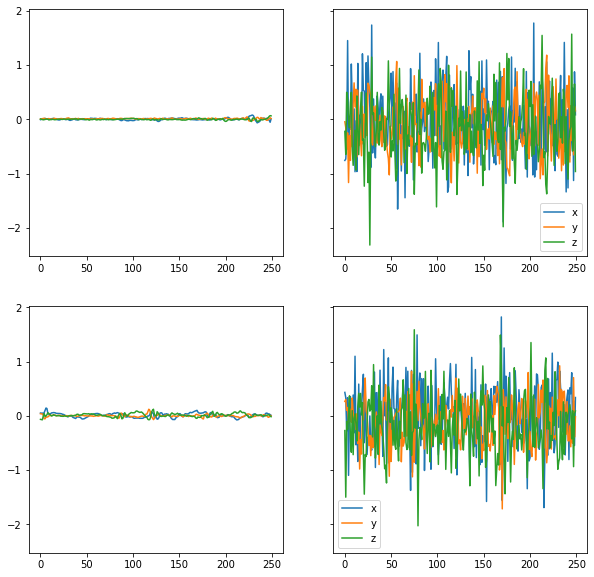

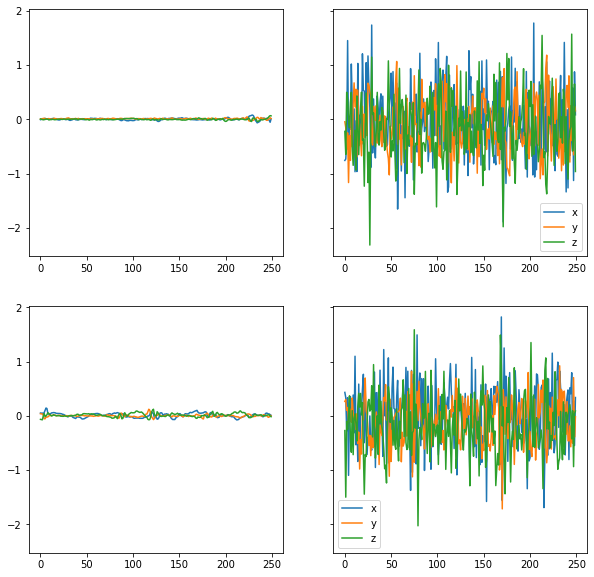

In [11]:
gan_evalator.plot_line_plot(2, random_state=42)